In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose                        
import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from simple_colors import *

# <font color='green'>EDA</font>

In [2]:
data=pd.read_csv('test_test.csv')
#data.head(2)

In [3]:
ts=pd.read_csv('time_ser.csv')
#ts.head(2)

In [4]:
statistics=pd.DataFrame()
statistics['Month']=data.index
statistics['Sq_trend_diff%']=round((data['2021 Sq_queries']/data['2020 Sq_queries'])*100,1)
statistics['Sq_visit_diff%']=round((data['2021 Sq_vis']/data['2020 Sq_vis'])*100,1)
#statistics

In [5]:
statistics=statistics.set_index('Month')
#statistics.to_csv('statistics.csv')

***

### 1.

In [6]:
queries_sq=data[['2020 Sq_queries','2021 Sq_queries']]
queries_sq=data[['2020 Sq_queries','2021 Sq_queries']]
queries_sq.columns=['2020','2021']

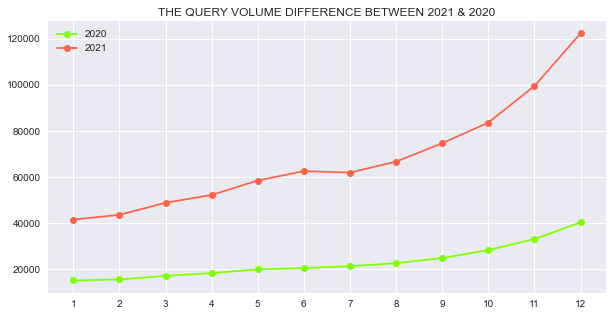

In [7]:
queries_sq.plot(figsize=(10,5),marker='o',color=['chartreuse','tomato'],title='THE QUERY VOLUME DIFFERENCE BETWEEN 2021 & 2020')
x=[1,2,3,4,5,6,7,8,9,10,11,12]
xi = list(range(len(x)))
plt.xticks(xi,x)
plt.show()

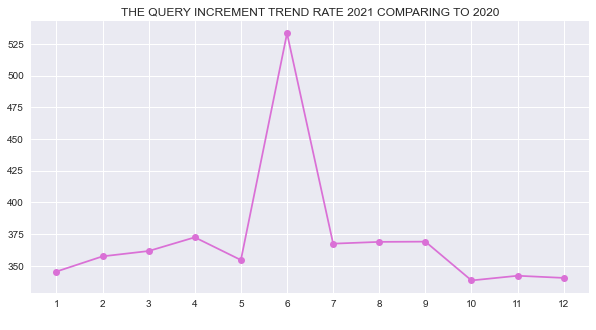

In [8]:
statistics['Sq_visit_diff%'].plot(figsize=(10,5),marker='o',color='orchid',xlabel=' ',title='THE QUERY INCREMENT TREND RATE 2021 COMPARING TO 2020')
x=[1,2,3,4,5,6,7,8,9,10,11,12]
xi = list(range(len(x)))
plt.xticks(xi,x)
plt.show()

In [9]:
print('The average increment rate of search queries in 2021 is',round(statistics['Sq_trend_diff%'].mean(),1),'%')

The average increment rate of search queries in 2021 is 293.7 %


***

### 2.

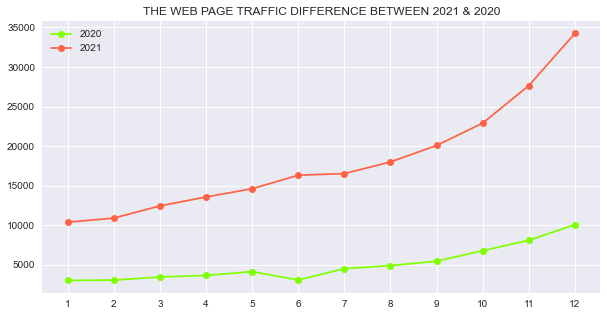

In [16]:
visits=data[['2020 Sq_vis','2021 Sq_vis']]
visits.columns=['2020','2021']
visits.plot(figsize=(10,5),marker='o',color=['chartreuse','tomato'],title='THE WEB PAGE TRAFFIC DIFFERENCE BETWEEN 2021 & 2020')
x=[1,2,3,4,5,6,7,8,9,10,11,12]
xi = list(range(len(x)))
plt.xticks(xi,x)
plt.show()

In [17]:
print('The average increae rate of visits in 2021 is',round(statistics['Sq_visit_diff%'].mean(),1),'%')

The average increae rate of visits in 2021 is 371.0 %


***

### 3.

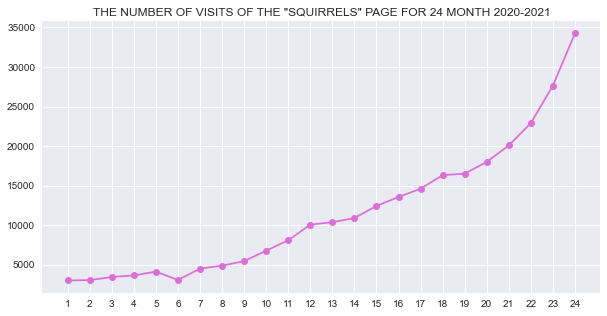

In [69]:
ts['Squirrel'].plot(figsize=(10,5),marker='o',color='orchid',title='THE NUMBER OF VISITS OF THE "SQUIRRELS" PAGE FOR 24 MONTH 2020-2021')
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
xi = list(range(len(x)))
plt.xticks(xi,x)
plt.show()

In [21]:
print('The average number of visits in 2020:',black(round(data['2020 Sq_vis'].mean()),['bold']))
print('The average number of visits in 2021:',black(round(data['2021 Sq_vis'].mean()),['bold']))
print('The average number of visits for 24 month of 2020-2021:',red(round(ts['Squirrel'].mean()),['bold']))

The average number of visits in 2020: 5001
The average number of visits in 2021: 18127
The average number of visits for 24 month of 2020-2021: 11564


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
values=ts[['Squirrel','Squirrel Query']]
scaler.fit(values1)
plot=scaler.transform(values1)
plot=pd.DataFrame(plot1)
plot.colunms=['visits','queries']
plot=plot.rename(columns={0:'visits',1:'queries'})

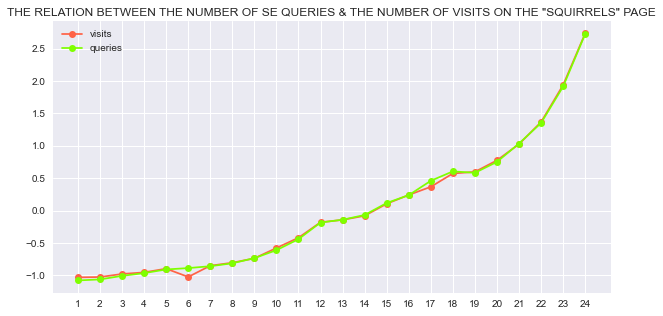

In [70]:
plot.plot(figsize=(10,5),marker='o',color=['tomato','chartreuse'],title='THE RELATION BETWEEN THE NUMBER OF SE QUERIES & THE NUMBER OF VISITS ON THE "SQUIRRELS" PAGE')
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
xi = list(range(len(x)))
plt.xticks(xi,x)
plt.show()

In [42]:
correlated=pd.DataFrame(values.corr())
print('The correlation between the query volume & the page traffic is:',red(round(float(correlated['Squirrel Query'][:1]*100))),red('%'))

The correlation between the query volume & the page traffic is: 100 %


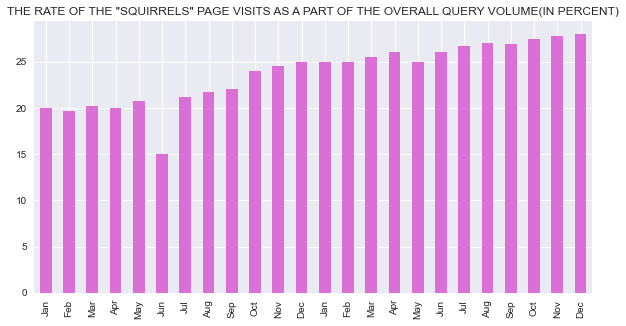

In [71]:
correlated1=round((values['Squirrel']/values['Squirrel Query'])*100,1)
correlated1.plot(kind='bar',figsize=(10,5),color='orchid',title='THE RATE OF THE "SQUIRRELS" PAGE VISITS AS A PART OF THE OVERALL QUERY VOLUME(IN PERCENT)')
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
xi = list(range(len(x)))
plt.xticks(xi,x)
plt.show()

In [49]:
print('The rate of the "Squirrels" page visits from the whole number of queriesvaried from',correlated1.min(),'%','to',correlated1.max(),'%')

The rate of the "Squirrels" page visits from the whole number of queriesvaried from 15.0 % to 28.0 %


***

***

# <font color='green'>TIME SERIES ANALYSIS</font>

### 4.

In [60]:
ts_sq=ts.drop(['Elephant','Elephant Query','Squirrel Query'],axis=1)
ts_sq.set_index('Month', inplace=True)
ts_sq.index = pd.to_datetime(ts_sq.index)

In [55]:
s_dec = seasonal_decompose(ts_sq['Squirrel'],model='additive',period=1)
#s_dec.plot();

**<font color='orchid'>ARIMA</font>**

In [61]:
oos_results = []
month_to_predict = 11
oos_train_data = ts_sq
for i, col in enumerate(ts_sq.columns):
    #Fit best model for each column
    s = auto_arima(oos_train_data[col], trace=True)
    oos_arima_model = SARIMAX(oos_train_data[col],
                          order = s.get_params()['order'],
                          seasonal_order = s.get_params()['seasonal_order'])
    oos_arima_result = oos_arima_model.fit()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=377.151, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=373.202, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=374.109, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=374.375, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=376.034, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=373.572, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.416 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73514D+00    |proj g|=  7.79961D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauch

 This problem is unconstrained.


***

### 5.

**<font color='orchid'>FORECAST</font>**

In [57]:
oos_arima_pred = oos_arima_result.predict(start = len(oos_train_data),
                                          end = len(oos_train_data) + month_to_predict, typ="levels").rename("ARIMA Predictions")

In [62]:
prediction_sq=pd.DataFrame(oos_arima_pred)
#prediction_sq.to_csv('elephant.csv')
prediction_sqp=prediction_sq.transpose()
prediction_sqp.columns=['January','February','March','April','May','June','July','August','September','October','November','December']
print(red('Prediction of the monthly traffic of the page "Squirrels" in 2022":',['bold']))
prediction_sqp

Prediction of the monthly traffic of the page "Squirrels" in 2022":


,January,February,March,April,May,June,July,August,September,October,November,December
ARIMA Predictions,40856.0,47460.0,54064.0,60668.0,67272.0,73876.0,80480.0,87084.0,93688.0,100292.0,106896.0,113500.0


***

### 6.

In [65]:
prediction=np.array(prediction_sq['ARIMA Predictions'])
vis=np.array(data['2021 Sq_vis'])
trend=pd.DataFrame((prediction/vis)*100)
trend_t=trend.transpose()
trend_t=round(trend_t)
trend_t.columns=['January','February','March','April','May','June','July','August','September','October','November','December']

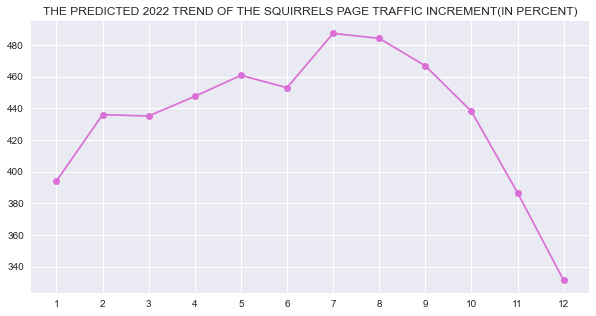

In [66]:
trend.plot(figsize=(10,5),marker='o',legend=False,color='orchid',title='THE PREDICTED 2022 TREND OF THE SQUIRRELS PAGE TRAFFIC INCREMENT(IN PERCENT)')
x=[1,2,3,4,5,6,7,8,9,10,11,12]
xi = list(range(len(x)))
plt.xticks(xi,x)
plt.show()

In [72]:
print(red('Prediction of the monthly traffic trend of the page "Squirrels" in 2022:',['bold']))
trend_t=(trend_t.astype(str) + '%')
trend_t

Prediction of the monthly traffic trend of the page "Squirrels" in 2022:


,January,February,March,April,May,June,July,August,September,October,November,December
0,394.0%%,436.0%%,435.0%%,448.0%%,461.0%%,453.0%%,487.0%%,484.0%%,467.0%%,438.0%%,387.0%%,331.0%%


In [68]:
print('The model predicts the average monthly traffic increment to be:',red(round(trend[0].mean()),['bold']),red('%',['bold']))

The model predicts the average monthly traffic increment to be: 435 %


***